In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

### 1. Data Preparation

In [2]:
# Load SKLearn's MNIST dataset

digits = load_digits()
X = digits.data
Y = digits.target

In [3]:
print(X.shape, Y.shape)

(1797, 64) (1797,)


In [4]:
# print(digits.DESCR)

5

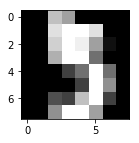

In [5]:
plt.figure(figsize=(2,2))
plt.imshow(X[5].reshape((8,8)), cmap='gray')
Y[5]

In [6]:
print(X[5])
# 16 levels (shades) of gray, where 0 = black, 16 = white

[ 0.  0. 12. 10.  0.  0.  0.  0.  0.  0. 14. 16. 16. 14.  0.  0.  0.  0.
 13. 16. 15. 10.  1.  0.  0.  0. 11. 16. 16.  7.  0.  0.  0.  0.  0.  4.
  7. 16.  7.  0.  0.  0.  0.  0.  4. 16.  9.  0.  0.  0.  5.  4. 12. 16.
  4.  0.  0.  0.  9. 16. 16. 10.  0.  0.]


### 2. Train Models

In [7]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [8]:
gnb = GaussianNB()
mnb = MultinomialNB()

In [9]:
# Train
gnb.fit(X, Y)
mnb.fit(X, Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [10]:
# Score => Returns the mean accuracy on the given test data and labels
print(gnb.score(X, Y))
print(mnb.score(X, Y))

0.8580968280467446
0.9053978853644964


In [11]:
print(cross_val_score(gnb, X, Y, scoring="accuracy", cv=10))      # 10 fold cross validation => 10 diff accuracies
cross_val_score(gnb, X, Y, scoring="accuracy", cv=10).mean()

[0.76756757 0.81967213 0.89502762 0.71111111 0.72625698 0.84357542
 0.8547486  0.86516854 0.8079096  0.8125    ]


0.8103537583567821

In [12]:
print(cross_val_score(mnb, X, Y, scoring="accuracy", cv=10))
cross_val_score(mnb, X, Y, scoring="accuracy", cv=10).mean()

[0.85405405 0.94535519 0.88950276 0.81666667 0.86592179 0.8547486
 0.97206704 0.94382022 0.80225989 0.875     ]


0.8819396216300838

In [13]:
# This is because each feature is discrete valued, not continuous. That is why Multinomial NB performs better than
# Gaussian NB

In [14]:
#   This function prints and plots the confusion matrix.
#   Normalization can be applied by setting `normalize=True`.

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout() 

In [15]:
class_list = np.arange(10)
print(class_list)

[0 1 2 3 4 5 6 7 8 9]


In [16]:
from sklearn.metrics import confusion_matrix

In [19]:
Y_mnb = mnb.predict(X)
cnf = confusion_matrix(Y, Y_mnb)
print(cnf)

[[175   0   0   0   3   0   0   0   0   0]
 [  0 137  14   0   0   1   2   0  13  15]
 [  0   7 160   0   0   0   0   0   8   2]
 [  0   0   2 159   0   2   0   5   8   7]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  11   1   0   1   0   1   1 154   5]
 [  0   1   0   1   1   1   0  11   7 158]]


Confusion matrix, without normalization
[[175   0   0   0   3   0   0   0   0   0]
 [  0 137  14   0   0   1   2   0  13  15]
 [  0   7 160   0   0   0   0   0   8   2]
 [  0   0   2 159   0   2   0   5   8   7]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  11   1   0   1   0   1   1 154   5]
 [  0   1   0   1   1   1   0  11   7 158]]


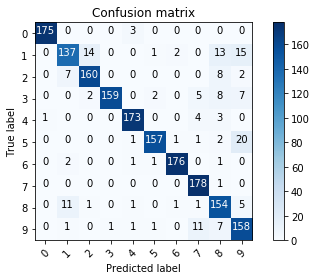

In [20]:
plot_confusion_matrix(cnf, class_list)

In [21]:
Y_gnb = gnb.predict(X)
cnf2 = confusion_matrix(Y, Y_gnb)
print(cnf2)

[[176   0   0   0   1   0   0   1   0   0]
 [  0 154   0   0   0   0   3   5  14   6]
 [  0  13 113   0   0   1   1   0  49   0]
 [  0   2   2 145   0   6   0   7  20   1]
 [  1   1   0   0 152   1   2  21   3   0]
 [  0   0   0   3   0 169   1   6   2   1]
 [  0   1   0   0   0   1 179   0   0   0]
 [  0   0   0   0   1   1   0 177   0   0]
 [  0   8   0   1   0   3   0  12 150   0]
 [  1   6   0   5   1   3   0  17  20 127]]


Confusion matrix, without normalization
[[176   0   0   0   1   0   0   1   0   0]
 [  0 154   0   0   0   0   3   5  14   6]
 [  0  13 113   0   0   1   1   0  49   0]
 [  0   2   2 145   0   6   0   7  20   1]
 [  1   1   0   0 152   1   2  21   3   0]
 [  0   0   0   3   0 169   1   6   2   1]
 [  0   1   0   0   0   1 179   0   0   0]
 [  0   0   0   0   1   1   0 177   0   0]
 [  0   8   0   1   0   3   0  12 150   0]
 [  1   6   0   5   1   3   0  17  20 127]]


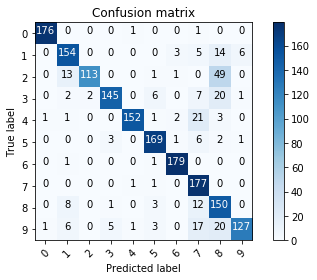

In [22]:
plot_confusion_matrix(cnf2, class_list)

In [ ]:
# Calculate precision and recall